In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

%matplotlib inline

In [39]:
df = pd.read_csv("mini_mnist.csv")
df.tail()
x = df.loc[:,df.columns != 'digito']
x.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,pixel_41,pixel_42,pixel_43,pixel_44,pixel_45,pixel_46,pixel_47,pixel_48,pixel_49,pixel_50,pixel_51,pixel_52,pixel_53,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,pixel_64,pixel_65,pixel_66,pixel_67,pixel_68,pixel_69,pixel_70,pixel_71,pixel_72,pixel_73,pixel_74,pixel_75,pixel_76,pixel_77,pixel_78,pixel_79,pixel_80,pixel_81,pixel_82,pixel_83,pixel_84,pixel_85,pixel_86,pixel_87,pixel_88,pixel_89,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,pixel_100,pixel_101,pixel_102,pixel_103,pixel_104,pixel_105,pixel_106,pixel_107,pixel_108,pixel_109,pixel_110,pixel_111,pixel_112,pixel_113,pixel_114,pixel_115,pixel_116,pixel_117,pixel_118,pixel_119,pixel_120,pixel_121,pixel_122,pixel_123,pixel_124,pixel_125,pixel_126,pixel_127,pixel_128,pixel_129,pixel_130,pixel_131,pixel_132,pixel_133,pixel_134,pixel_135,pixel_136,pixel_137,pixel_138,pixel_139,pixel_140,pixel_141,pixel_142,pixel_143,pixel_144,pixel_145,pixel_146,pixel_147,pixel_148,pixel_149,pixel_150,pixel_151,pixel_152,pixel_153,pixel_154,pixel_155,pixel_156,pixel_157,pixel_158,pixel_159,pixel_160,pixel_161,pixel_162,pixel_163,pixel_164,pixel_165,pixel_166,pixel_167,pixel_168,pixel_169,pixel_170,pixel_171,pixel_172,pixel_173,pixel_174,pixel_175,pixel_176,pixel_177,pixel_178,pixel_179,pixel_180,pixel_181,pixel_182,pixel_183,pixel_184,pixel_185,pixel_186,pixel_187,pixel_188,pixel_189,pixel_190,pixel_191,pixel_192,pixel_193,pixel_194,pixel_195,pixel_196,pixel_197,pixel_198,pixel_199,pixel_200,pixel_201,pixel_202,pixel_203,pixel_204,pixel_205,pixel_206,pixel_207,pixel_208,pixel_209,pixel_210,pixel_211,pixel_212,pixel_213,pixel_214,pixel_215,pixel_216,pixel_217,pixel_218,pixel_219,pixel_220,pixel_221,pixel_222,pixel_223,pixel_224,pixel_225,pixel_226,pixel_227,pixel_228,pixel_229,pixel_230,pixel_231,pixel_232,pixel_233,pixel_234,pixel_235,pixel_236,pixel_237,pixel_238,pixel_239,pixel_240,pixel_241,pixel_242,pixel_243,pixel_244,pixel_245,pixel_246,pixel_247,pixel_248,pixel_249,pixel_250,pixel_251,pixel_252,pixel_253,pixel_254,pixel_255,pixel_256,pixel_257,pixel_258,pixel_259,pixel_260,pixel_261,pixel_262,pixel_263,pixel_264,pixel_265,pixel_266,pixel_267,pixel_268,pixel_269,pixel_270,pixel_271,pixel_272,pixel_273,pixel_274,pixel_275,pixel_276,pixel_277,pixel_278,pixel_279,pixel_280,pixel_281,pixel_282,pixel_283,pixel_284,pixel_285,pixel_286,pixel_287,pixel_288,pixel_289,pixel_290,pixel_291,pixel_292,pixel_293,pixel_294,pixel_295,pixel_296,pixel_297,pixel_298,pixel_299,pixel_300,pixel_301,pixel_302,pixel_303,pixel_304,pixel_305,pixel_306,pixel_307,pixel_308,pixel_309,pixel_310,pixel_311,pixel_312,pixel_313,pixel_314,pixel_315,pixel_316,pixel_317,pixel_318,pixel_319,pixel_320,pixel_321,pixel_322,pixel_323,pixel_324,pixel_325,pixel_326,pixel_327,pixel_328,pixel_329,pixel_330,pixel_331,pixel_332,pixel_333,pixel_334,pixel_335,pixel_336,pixel_337,pixel_338,pixel_339,pixel_340,pixel_341,pixel_342,pixel_343,pixel_344,pixel_345,pixel_346,pixel_347,pixel_348,pixel_349,pixel_350,pixel_351,pixel_352,pixel_353,pixel_354,pixel_355,pixel_356,pixel_357,pixel_358,pixel_359,pixel_360,pixel_361,pixel_362,pixel_363,pixel_364,pixel_365,pixel_366,pixel_367,pixel_368,pixel_369,pixel_370,pixel_371,pixel_372,pixel_373,pixel_374,pixel_375,pixel_376,pixel_377,pixel_378,pixel_379,pixel_380,pixel_381,pixel_382,pixel_383,pixel_384,pixel_385,pixel_386,pixel_387,pixel_388,pixel_389,pixel_390,pixel_391,pixel_392,pixel_393,pixel_394,pixel_395,pixel_396,pixel_397,pixel_398,pixel_399,pixel_400,pixel_401,pixel_402,pixel_403,pixel_404,pixel_405,pixel_406,pixel_407,pixel_408,pixel_409,pixel_410

In [40]:
pd.set_option("display.max_columns", None)
df.groupby("digito").describe()

pixel_0                                    pixel_1                      \
         count mean  std  min  25%  50%  75%  max   count mean  std  min  25%   
digito                                                                          
0        148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0  0.0  0.0  0.0   
1        169.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   169.0  0.0  0.0  0.0  0.0   
2        149.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0  0.0  0.0  0.0   
3        153.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   153.0  0.0  0.0  0.0  0.0   
4        146.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0  0.0  0.0  0.0   
5        135.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   135.0  0.0  0.0  0.0  0.0   
6        148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0  0.0  0.0  0.0   
7        157.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   157.0  0.0  0.0  0.0  0.0   
8        146.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0  0.0  0.0  0.0   
9        149.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0  0.0  0.0  0.0   

                      pixel_2                                    pixel_3       \
        50%  75%  max   count mean  std  min  25%  50%  75%  max   count mean   
digito                                                                          
0       0.0  0.0  0.0   148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0   
1       0.0  0.0  0.0   169.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   169.0  0.0   
2       0.0  0.0  0.0   149.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0   
3       0.0  0.0  0.0   153.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   153.0  0.0   
4       0.0  0.0  0.0   146.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0   
5       0.0  0.0  0.0   135.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   135.0  0.0   
6       0.0  0.0  0.0   148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0   
7       0.0  0.0  0.0   157.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   157.0  0.0   
8       0.0  0.0  0.0   146.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0   
9       0.0  0.0  0.0   149.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0   

                                     pixel_4                                \
        std  min  25%  50%  75%  max   count mean  std  min  25%  50%  75%   
digito                                                                       
0       0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0   169.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0   153.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0  0.0  0.0  0.0  0.0  0.0   
5       0.0  0.0  0.0  0.0  0.0  0.0   135.0  0.0  0.0  0.0  0.0  0.0  0.0   
6       0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0  0.0  0.0  0.0  0.0  0.0   
7       0.0  0.0  0.0  0.0  0.0  0.0   157.0  0.0  0.0  0.0  0.0  0.0  0.0   
8       0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0  0.0  0.0  0.0  0.0  0.0   
9       0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0  0.0  0.0  0.0  0.0  0.0   

            pixel_5                                    pixel_6                 \
        max   count mean  std  min  25%  50%  75%  max   count mean  std  min   
digito                                                                          
0       0.0   148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0  0.0  0.0   
1       0.0   169.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   169.0  0.0  0.0  0.0   
2       0.0   149.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   149.0  0.0  0.0  0.0   
3       0.0   153.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   153.0  0.0  0.0  0.0   
4       0.0   146.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   146.0  0.0  0.0  0.0   
5       0.0   135.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   135.0  0.0  0.0  0.0   
6       0.0   148.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   148.0  0.0  0.0  0.0   
7       0.0   157.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   157.0  0.0  0.0  

# PCA

In [41]:
from sklearn.decomposition import PCA

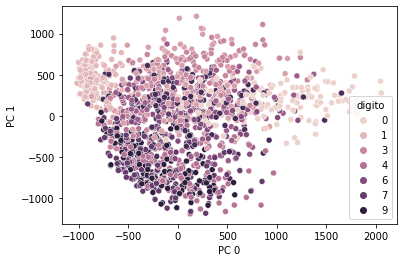

In [42]:
pca = PCA(n_components=2)
pca.fit(x) 
x = pca.transform(x)

x = pd.DataFrame(x, columns=['PC 0', 'PC 1'])

sns.scatterplot(data=x, x='PC 0', y='PC 1', hue=df['digito'])
X = x.values
y = df['digito'].values

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

### Otimização do hiperparâmetro e melhor k

In [44]:
def selecionar_melhor_k(ks, X_treino, X_val, y_treino, y_val):
    acuracias_val = []

    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_treino, y_treino)
        pred = knn.predict(X_val)
        acuracias_val.append(accuracy_score(y_val, pred))
        
    melhor_val = max(acuracias_val)
    melhor_k = ks[np.argmax(acuracias_val)]        
    knn = KNeighborsClassifier(n_neighbors=melhor_k)
    knn.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])
    
    return knn, melhor_k, melhor_val

### Otimização SVM

In [45]:
from joblib import Parallel, delayed
from sklearn.svm import SVC
import itertools


# Realiza o treinamento para cada hiperparâmetro
def treina_svm(C, gamma, X_treino, X_val, y_treino, y_val):
    svm = SVC(C= C, gamma= gamma)
    svm.fit(X_treino, y_treino)
    pred = svm.predict(X_val)
    return accuracy_score(y_val, pred)

def selecionar_melhor_svm(Cs, gamma, X_treino:np.ndarray, X_val:np.ndarray, y_treino:np.ndarray, y_val:np.ndarray, n_jobs=4):
    acuracias_val_svm = []
    # cria todas as combinações possíveis entre os Cs e os gammas
    hiperparametros = list(itertools.product(Cs, gamma))
    
    # Treina os modelos utilizando todas as combinações possíveis
    acuracias_val_svm = Parallel(n_jobs= n_jobs)(delayed(treina_svm)
            (c, g, X_treino, X_val, y_treino, y_val) for c, g in hiperparametros)


    melhor_acuracia = max(acuracias_val_svm)
    melhor_combinacao = hiperparametros[np.argmax(acuracias_val_svm)]
    
    svm = SVC(C= melhor_combinacao[0], gamma=melhor_combinacao[1])
    svm.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])


    return svm, melhor_combinacao[0], melhor_combinacao[1], melhor_acuracia

### KNN e SVM com 10 vias

In [48]:
#a validação cruzada será realizada em 10 vias.
k_vias = 10

#usar o protocolo de validação cruzada estratificada
skf = StratifiedKFold(n_splits=k_vias, shuffle=True, random_state=1)

Cs=[1, 10, 100, 1000]
gammas=['scale', 'auto', 2e-2, 2e-3, 2e-4]

acuracia_knn = []
acuracia_svm = []

#a função split retorna os índices das instâncias que devem ser usadas para o treinamento e o teste.
for idx_treino, idx_teste in skf.split(X, y):
    
    #extrair as instâncias de treinamento de acordo com os índices fornecidos pelo skf.split
    X_treino = X[idx_treino]
    y_treino = y[idx_treino]
    
    #extrair as instâncias de teste de acordo com os índices fornecidos pelo skf.split
    X_teste = X[idx_teste]
    y_teste = y[idx_teste]
    
    #separar as instâncias de treinamento entre treinamento e validação para a otimização do hiperparâmetro k
    X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size=0.2, stratify=y_treino, shuffle=True, random_state=1)
    
    #colocar todas as variáveis na mesma escala, usando o conjunto de treinamento para calcular os parâmetros da escala
    ss = StandardScaler()
    ss.fit(X_treino)
    X_treino = ss.transform(X_treino)
    X_teste = ss.transform(X_teste)
    X_val = ss.transform(X_val)

    #escolher o k com o melhor resultado no conjunto de validação e treinar o KNN com o melhor k.
    knn, _, _ = selecionar_melhor_k(range(1,30,2), X_treino, X_val, y_treino, y_val)
    svm, _, _, _ = selecionar_melhor_svm(Cs, gammas,X_treino, X_val, y_treino, y_val)

    pred_knn = knn.predict(X_teste)
    pred_svm = svm.predict(X_teste)

    score_knn = accuracy_score(y_teste, pred_knn)
    score_svm = accuracy_score(y_teste, pred_svm)
    
    acuracia_knn.append(score_knn)
    acuracia_svm.append(score_svm)


    print("Acurácia KNN para o fold: %.2f" % (score_knn))
    print("Acurácia SVM para o fold: %.2f" % (score_svm))


#calcular as estatísticas da validação cruzada. Estas estatísticas nos dão uma confiança que, na média, este é o desempenho esperado
#do classificador no mundo real.
print("\nKNN\nmin: %.2f, max: %.2f, avg +- std: %.2f+-%.2f\n" % (min(acuracia_knn), max(acuracia_knn), np.mean(acuracia_knn), np.std(acuracia_knn)))
print("SVM\nmin: %.2f, max: %.2f, avg +- std: %.2f+-%.2f\n" % (min(acuracia_svm), max(acuracia_svm), np.mean(acuracia_svm), np.std(acuracia_svm)))

Acurácia KNN para o fold: 0.41
Acurácia SVM para o fold: 0.42
Acurácia KNN para o fold: 0.39
Acurácia SVM para o fold: 0.43
Acurácia KNN para o fold: 0.39
Acurácia SVM para o fold: 0.45
Acurácia KNN para o fold: 0.36
Acurácia SVM para o fold: 0.41
Acurácia KNN para o fold: 0.43
Acurácia SVM para o fold: 0.45
Acurácia KNN para o fold: 0.38
Acurácia SVM para o fold: 0.41
Acurácia KNN para o fold: 0.43
Acurácia SVM para o fold: 0.43
Acurácia KNN para o fold: 0.47
Acurácia SVM para o fold: 0.47
Acurácia KNN para o fold: 0.42
Acurácia SVM para o fold: 0.39
Acurácia KNN para o fold: 0.37
Acurácia SVM para o fold: 0.39

KNN
min: 0.36, max: 0.47, avg +- std: 0.41+-0.03

SVM
min: 0.39, max: 0.47, avg +- std: 0.43+-0.02



Após análise dos resultados é possível perceber melhores resultados utilizando SVM, mesmo possúindo acurácias máximas iguais, as acurácias mínimas foram maiores, deixando assim a média das acurácias superior.

# Teste-T

In [47]:
from scipy.stats import ttest_ind_from_stats
# Calcular p-value
_, pvalor = ttest_ind_from_stats(np.mean(acuracia_svm), np.std(acuracia_svm), len(acuracia_svm), np.mean(acuracia_knn), np.std(acuracia_knn), len(acuracia_knn))

if(pvalor<=0.05):
    print("É possível refutar a hipótese nula")
else:
    print("Não é possível refutar a hipótese nula")

print("P-Value tem valor igual à: %.4f" % pvalor)

Não é possível refutar a hipótese nula
P-Value tem valor igual à: 0.1359


Através do resultado podemos observar que o valor de P é alto, sendo assim a diferença entre as médias não é significativa, não sendo possível refutar a hipótese nula